# Title: Preemptive CPU Scheduling

# Abstract:


This project focuses on the implementation of preemptive CPU Scheduling Algorithms: Round Robin, Shortest Remaining Time, and Preemptive Priority.
The CPU scheduling aspects of an Operating System kernel is also simulated here. These algorithms are ran on the simulated kernel to generate statistics about their efficiencies in terms of wait time, turnaround time, and response time. Concepts such as fairness and starvation with respect to each algorithm are explored, backing the exploration with numbers, statistics, and visualizations.


# Results:

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import plotly.express as px
import operating_system
import scheduler
import process

### Testing Round Robin Algorithm

In [2]:
test_processes1 = []

# creating processes
process0 = process.Process(0, # ID
                           [5, 1, 7], # duty
                           0, # arrival time
                           30) # priority
process1 = process.Process(1, [4, 4, 2], 2, 35)
process2 = process.Process(2, [1, 6, 2], 5, 36)
process3 = process.Process(3, [6, 1, 5], 6, 20)

test_processes1.append(process0)
test_processes1.append(process1)
test_processes1.append(process2)
test_processes1.append(process3)

In [3]:
dp = operating_system.kernel(scheduler.RR_scheduler, test_processes1, "rr_test.csv", 2)

average_response_time = dp["response time"].mean(axis=0)
average_wait_time = dp["wait time"].mean(axis=0)
average_turnaround_time = dp["turnaround time"].mean(axis=0)

Inside kernel
Inside kernel: ready not empty
Inside kernel
Inside kernel: ready not empty
Inside kernel
Inside kernel: ready not empty
Inside kernel
Inside kernel: ready not empty
Inside kernel
Inside kernel: ready not empty
Inside kernel
Inside kernel: ready not empty
Inside kernel
Inside kernel: ready not empty
Inside kernel
Inside kernel: ready not empty
Inside kernel
Inside kernel: ready not empty


In [4]:
df = pd.read_csv("rr_test.csv")
df.head()

,process,Start,Finish,Priority
0,0,0,2,30
1,1,2,4,35
2,0,4,6,30
3,1,6,8,35
4,2,8,9,36


In [5]:
dp.head()

,processes,response time,wait time,turnaround time
0,Process(id:0),0,7,12
1,Process(id:1),0,2,8
2,Process(id:2),3,3,9
3,Process(id:3),3,4,16


In [6]:
print(f"RR has an average response time of {average_response_time}")
print(f"RR has an average wait time of {average_wait_time}")
print(f"RR has an average turnaround time of {average_turnaround_time}")

RR has an average response time of 1.5
RR has an average wait time of 4.0
RR has an average turnaround time of 11.25


In [7]:
fig = px.timeline(df, x_start="Start", x_end="Finish", y="process", color="Priority")

df['delta'] = df['Finish'] - df['Start']
fig.layout.xaxis.type = 'linear'
fig.data[0].x = df.delta.tolist()
fig.data[0].base = df.Start.tolist()
fig.show()

### Testing Shortest Remaining Time Algorithm 

In [8]:
test_processes2 = []

# creating processes
process0 = process.Process(0, # ID
                           [5, 1, 7], # duty
                           0, # arrival time
                           30) # priority
process1 = process.Process(1, [4, 4, 2], 2, 35)
process2 = process.Process(2, [1, 6, 2], 5, 36)
process3 = process.Process(3, [6, 1, 5], 6, 20)

test_processes2.append(process0)
test_processes2.append(process1)
test_processes2.append(process2)
test_processes2.append(process3)

In [9]:
dp = operating_system.kernel(scheduler.SRT_scheduler, test_processes2, "srt_test.csv")

average_response_time = dp["response time"].mean(axis=0)
average_wait_time = dp["wait time"].mean(axis=0)
average_turnaround_time = dp["turnaround time"].mean(axis=0)

Inside kernel
Inside kernel: ready not empty
Inside kernel
Inside kernel: ready not empty
Inside kernel
Inside kernel: ready not empty
Inside kernel
Inside kernel: ready not empty


In [10]:
df = pd.read_csv("srt_test.csv")
df.head()

,process,Start,Finish,Priority
0,0,0,5,30
1,2,5,6,36
2,1,6,10,35
3,3,10,16,20


In [11]:
dp.head()

,processes,response time,wait time,turnaround time
0,Process(id:0),0,0,5
1,Process(id:1),4,4,10
2,Process(id:2),0,0,6
3,Process(id:3),4,4,16


In [12]:

print(f"SRT has an average response time of {average_response_time}")
print(f"SRT has an average wait time of {average_wait_time}")
print(f"SRT has an average turnaround time of {average_turnaround_time}")

SRT has an average response time of 2.0
SRT has an average wait time of 2.0
SRT has an average turnaround time of 9.25


In [13]:
fig = px.timeline(df, x_start="Start", x_end="Finish", y="process", color="Priority")

df['delta'] = df['Finish'] - df['Start']
fig.layout.xaxis.type = 'linear'
fig.data[0].x = df.delta.tolist()
fig.data[0].base = df.Start.tolist()
fig.show()

### Testing Preemptive Priority Algorithm

In [14]:
test_processes3 = []

# creating processes
process0 = process.Process(0, # ID
                           [5, 1, 7], # duty
                           0, # arrival time
                           30) # priority
process1 = process.Process(1, [4, 4, 2], 2, 35)
process2 = process.Process(2, [1, 6, 2], 5, 36)
process3 = process.Process(3, [6, 1, 5], 6, 20)

test_processes3.append(process0)
test_processes3.append(process1)
test_processes3.append(process2)
test_processes3.append(process3)

In [15]:
dp = operating_system.kernel(scheduler.PP_scheduler, test_processes3, "pp_test.csv")

pp_response = list(dp["response time"])
pp_wait = list(dp["wait time"])
pp_turnaround = list(dp["turnaround time"])

average_response_time = dp["response time"].mean(axis=0)
average_wait_time = dp["wait time"].mean(axis=0)
average_turnaround_time = dp["turnaround time"].mean(axis=0)

Inside kernel
Inside kernel: ready not empty
Just above while loop in scheduler
Inside while loop in scheduler
Inside while loop in scheduler
Inside kernel
Inside kernel: ready not empty
Just above while loop in scheduler
Inside while loop in scheduler
Inside while loop in scheduler
Inside while loop in scheduler
Inside kernel
Inside kernel: ready not empty
Just above while loop in scheduler
Inside while loop in scheduler
Inside kernel
Inside kernel: ready not empty
Just above while loop in scheduler
Inside while loop in scheduler
Inside kernel
Inside kernel: ready not empty
Just above while loop in scheduler
Inside while loop in scheduler
Inside while loop in scheduler
Inside while loop in scheduler
Inside kernel
Inside kernel: ready not empty
Just above while loop in scheduler
Inside while loop in scheduler
Inside while loop in scheduler
Inside while loop in scheduler
Inside while loop in scheduler
Inside while loop in scheduler
Inside while loop in scheduler


In [16]:
df = pd.read_csv("pp_test.csv")
df.head()

,process,Start,Finish,Priority
0,0,0,2,30
1,1,2,5,35
2,2,5,6,36
3,1,6,7,35
4,0,7,10,30


In [17]:
dp.head()

,processes,response time,wait time,turnaround time
0,Process(id:0),0,5,10
1,Process(id:1),0,1,7
2,Process(id:2),0,0,6
3,Process(id:3),4,4,16


In [18]:
print(f"PP has an average response time of {average_response_time}")
print(f"PP has an average wait time of {average_wait_time}")
print(f"PP has an average turnaround time of {average_turnaround_time}")

PP has an average response time of 1.0
PP has an average wait time of 2.5
PP has an average turnaround time of 9.75


In [19]:
fig = px.timeline(df, x_start="Start", x_end="Finish", y="process", color="Priority")

df['delta'] = df['Finish'] - df['Start']
fig.layout.xaxis.type = 'linear'
fig.data[0].x = df.delta.tolist()
fig.data[0].base = df.Start.tolist()
fig.show()

### Testing Multi-Level Feedback Queue Algorithm

In [20]:
test_processes4 = []

# creating processes
process0 = process.Process(0, # ID
                           [5, 1, 7], # duty
                           0, # arrival time
                           30) # priority
process1 = process.Process(1, [4, 4, 2], 2, 35)
process2 = process.Process(2, [1, 6, 2], 5, 36)
process3 = process.Process(3, [6, 1, 5], 6, 20)

test_processes4.append(process0)
test_processes4.append(process1)
test_processes4.append(process2)
test_processes4.append(process3)

# process0 = process.Process(0, [5, 6, 7], 0, 30)
# process1 = process.Process(1, [4, 2, 3], 3, 35)
# process2 = process.Process(2, [2, 3, 4], 4, 36)
# process3 = process.Process(3, [5, 2, 7], 7, 20)

# test_processes4 = [process1, process2, process3, process0]

In [21]:
dp = operating_system.kernel(scheduler.MFQ_scheduler, test_processes4, "mfq_test.csv", levels=[4, 7, 100])

mfq_response = list(dp["response time"])
mfq_wait = list(dp["wait time"])
mfq_turnaround = list(dp["turnaround time"])

average_response_time = dp["response time"].mean(axis=0)
average_wait_time = dp["wait time"].mean(axis=0)
average_turnaround_time = dp["turnaround time"].mean(axis=0)

In [22]:
df = pd.read_csv("mfq_test.csv")
df.head()

,process,Start,Finish,Priority
0,0,0,4,30
1,1,4,8,35
2,2,8,9,36
3,3,9,13,20
4,1,13,15,35


In [23]:
dp.head()

,processes,response time,wait time,turnaround time
0,Process(id:0),0,29,27
1,Process(id:1),2,13,15
2,Process(id:2),3,13,17
3,Process(id:3),3,22,32


In [24]:
print(f"MFQ has an average response time of {average_response_time}")
print(f"MFQ has an average wait time of {average_wait_time}")
print(f"MFQ has an average turnaround time of {average_turnaround_time}")

MFQ has an average response time of 2.0
MFQ has an average wait time of 19.25
MFQ has an average turnaround time of 22.75


In [25]:
fig = px.timeline(df, x_start="Start", x_end="Finish", y="process", color="Priority")

df['delta'] = df['Finish'] - df['Start']
fig.layout.xaxis.type = 'linear'
fig.data[0].x = df.delta.tolist()
fig.data[0].base = df.Start.tolist()
fig.show()

## Comparison of the Algorithms on 1000 randomly generated processes

In [26]:
CPU_BOUND_CPU_RANGE = (8, 12) 
CPU_BOUND_IO_RANGE = (1, 3)

IO_BOUND_CPU_RANGE = (1, 3)  
IO_BOUND_IO_RANGE = (8, 12)

NUM_PROCESSES = 1000
HALF_PROCESSES = NUM_PROCESSES // 2  

processes = []

# Function to generate a duty list with alternating CPU and I/O bursts
def generate_duty_list(cpu_range, io_range):
    duty_list = []
    num_pairs = random.randint(2, 5)  
    
    for _ in range(num_pairs):
        duty_list.append(random.randint(*cpu_range))  
        duty_list.append(random.randint(*io_range))   
    
    return duty_list

# Generate CPU-bound processes
for i in range(HALF_PROCESSES):
    duty_list = generate_duty_list(CPU_BOUND_CPU_RANGE, CPU_BOUND_IO_RANGE)
    arrival_time = random.randint(0, 50)  
    priority = random.randint(1, 40)  
    processes.append(process.Process(i, duty_list, arrival_time, priority))

# Generate I/O-bound processes
for i in range(HALF_PROCESSES, NUM_PROCESSES):
    duty_list = generate_duty_list(IO_BOUND_CPU_RANGE, IO_BOUND_IO_RANGE)
    arrival_time = random.randint(0, 50)
    priority = random.randint(1, 40) 
    processes.append(process.Process(i, duty_list, arrival_time, priority))


# Discussions

# Extension(s)

As an extension, I made elaborate diagrams

List to store results from each algorithm

In [27]:
rr_response, rr_wait, rr_turnaround = [], [], []
srt_response, srt_wait, srt_turnaround = [], [], []
pp_response, pp_wait, pp_turnaround = [], [], []
mfq_response, mfq_wait, mfq_turnaround = [], [], []

In [ ]:
for i in range(4):
    test_data = [
        process.Process(i, [random.randint(1, 10), random.randint(1, 10), random.randint(1, 10)], 
                        random.randint(0, 10), random.randint(20, 40)) 
        for i in range(10)
    ]
    test_data.append(process.Process(4, [random.randint(1, 10), random.randint(1, 10), random.randint(1, 10)], 
                                     0, random.randint(20, 40)))
    
    # Make a deep copy to ensure each scheduler gets the same data
    import copy
    test_data_copy = copy.deepcopy(test_data)

    # Run RR scheduler
    dp = operating_system.kernel(scheduler.RR_scheduler, copy.deepcopy(test_data_copy), "ext_test.csv", 2)
    rr_response.append(dp["response time"].mean())
    rr_wait.append(dp["wait time"].mean())
    rr_turnaround.append(dp["turnaround time"].mean())

    # Run SRT scheduler
    dp = operating_system.kernel(scheduler.SRT_scheduler, copy.deepcopy(test_data_copy), "ext_test.csv")
    srt_response.append(dp["response time"].mean())
    srt_wait.append(dp["wait time"].mean())
    srt_turnaround.append(dp["turnaround time"].mean())

    # Run PP scheduler
    dp = operating_system.kernel(scheduler.PP_scheduler, copy.deepcopy(test_data), "ext_test.csv")
    pp_response.append(dp["response time"].mean())
    pp_wait.append(dp["wait time"].mean())
    pp_turnaround.append(dp["turnaround time"].mean())

    # Run MFQ scheduler
    dp = operating_system.kernel(scheduler.MFQ_scheduler, copy.deepcopy(test_data), "ext_test.csv", levels=[4, 7, 100])
    mfq_response.append(dp["response time"].mean())
    mfq_wait.append(dp["wait time"].mean())
    mfq_turnaround.append(dp["turnaround time"].mean())


Inside kernel
Inside kernel: ready not empty
Inside kernel
Inside kernel: ready not empty
Inside kernel
Inside kernel: ready not empty
Inside kernel
Inside kernel: ready not empty
Inside kernel
Inside kernel: ready not empty
Inside kernel
Inside kernel: ready not empty
Inside kernel
Inside kernel: ready not empty
Inside kernel
Inside kernel: ready not empty
Inside kernel
Inside kernel: ready not empty
Inside kernel
Inside kernel: ready not empty
Inside kernel
Inside kernel: ready not empty
Inside kernel
Inside kernel: ready not empty
Inside kernel
Inside kernel: ready not empty
Inside kernel
Inside kernel: ready not empty
Inside kernel
Inside kernel: ready not empty
Inside kernel
Inside kernel: ready not empty
Inside kernel
Inside kernel: ready not empty
Inside kernel
Inside kernel: ready not empty
Inside kernel
Inside kernel: ready not empty
Just above while loop in scheduler
Inside while loop in scheduler
Inside while loop in scheduler
Inside while loop in scheduler
Inside while loop

In [29]:
for process in test_data:
    print(process, f"{process.get_duty()}", f"{process.get_arrival_time()}", f"{process.get_priority()}")

Process(id:0) [8, 3, 7] 6 22
Process(id:1) [7, 7, 7] 5 35
Process(id:2) [9, 5, 2] 6 39
Process(id:3) [1, 1, 7] 7 40
Process(id:4) [9, 1, 7] 0 27


In [30]:
response_times = {
    "RR": rr_response,
    "SRT": srt_response,
    "PP": pp_response,
    "MLFQ": mfq_response
}

wait_times = {
    "RR": rr_wait,
    "SRT": srt_wait,
    "PP": pp_wait,
    "MLFQ": mfq_wait
}

turnaround_times = {
    "RR": rr_turnaround,
    "SRT": srt_turnaround,
    "PP": pp_turnaround,
    "MLFQ": mfq_turnaround
}

In [31]:
algorithms = ["RR", "SRT", "PP", "MLFQ"]
epoc = ["epoc 1", "epoc 2", "epoc 3", "epoc 4"]


In [32]:
def plot_metric(metric_data, title, ylabel):
    plt.figure(figsize=(8, 5))

    for algo in algorithms:
        plt.plot(epoc, metric_data[algo], marker='*', linestyle='-', label=algo)

    plt.title(title)
    plt.xlabel("Epocs")
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

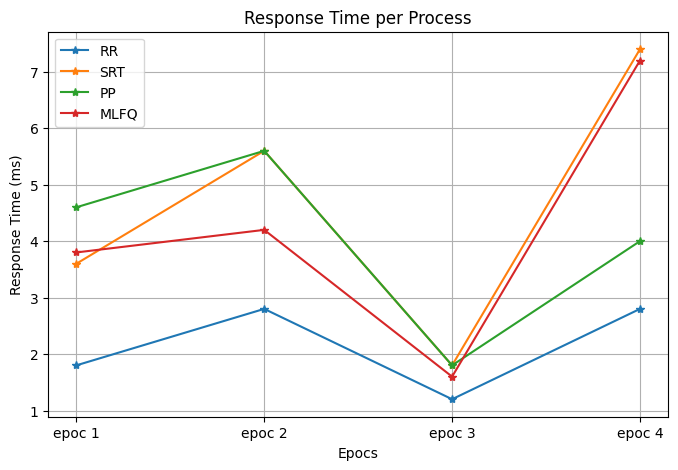

In [33]:
plot_metric(response_times, "Response Time per Process", "Response Time (ms)")



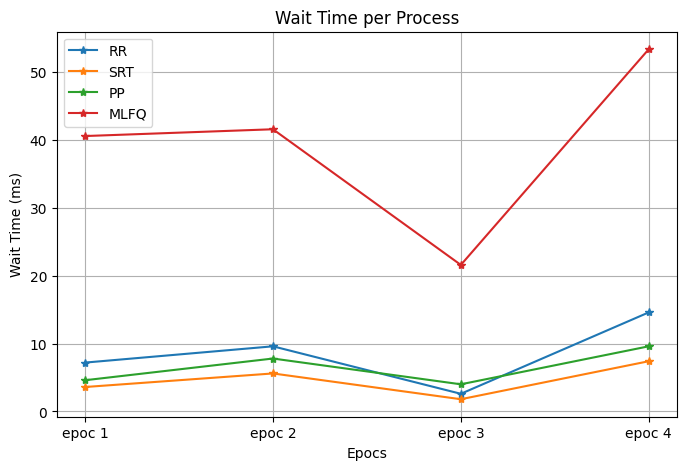

In [34]:
plot_metric(wait_times, "Wait Time per Process", "Wait Time (ms)")

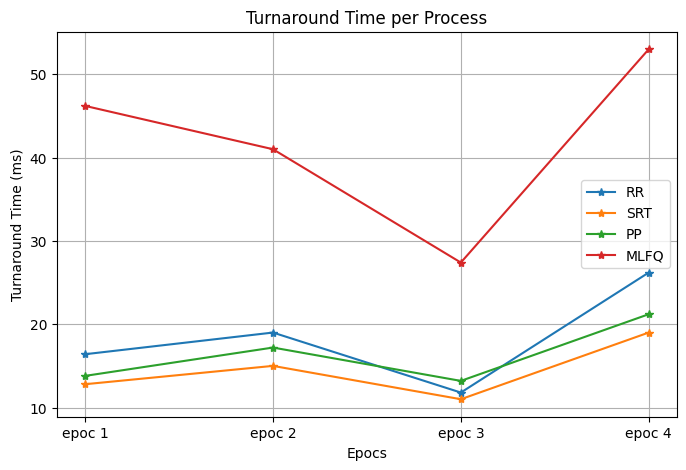

In [35]:
plot_metric(turnaround_times, "Turnaround Time per Process", "Turnaround Time (ms)")

# References/Acknowledgements

Derrick Agyemang Duah

Professor Naser Al Madi

StackOverFlow